# Laptop Price prediction

This notenook contains the code for the model building for the laptop price prediction. The best model from this notebook will be downloaded and used as a backend for building a strealit platform for Users to predict.

### Initial preparatory
Installing and updating the libraries needed to be updated.

In [2]:
#Upgrading XGBoost
!pip install xgboost --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.1/297.1 MB 3.6 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: xgboost
    Found existing installation: xgboost 1.7.6
    Uninstalling xgboost-1.7.6:
      Successfully uninstalled xgboost-1.7.6


In [3]:
#Updating pip and streamlit for deployment purpose 
!pip3 install --upgrade pip
!pip install streamlit --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 21.6 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: pip
    Found existing installation: pip 23.1.2
    Uninstalling pip-23.1.2:
      Successfully uninstalled pip-23.1.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 32.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 77.3 MB/s eta 0:00:00:00:0100:01


## Step 1

This step is for the importation of the dataset, also checking characteristics of the dataset for validation, and missing data.

In [ ]:
#Import numpy and pandas
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [6]:
#Import dataset
laptop = pd.read_csv("laptop_price (1).csv", encoding='latin-1')

In [7]:
#Checking the first five rows of the dataset
laptop.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [8]:
#Checking the shape of the dataset
laptop.shape

(1303, 13)

In [9]:
#Data description and cheking data type
laptop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


In [10]:
#Checking fro unique count of each variables
laptop.nunique()

laptop_ID           1303
Company               19
Product              618
TypeName               6
Inches                18
ScreenResolution      40
Cpu                  118
Ram                    9
Memory                39
Gpu                  110
OpSys                  9
Weight               179
Price_euros          791
dtype: int64

In [11]:
#Checking for missing value
laptop.isna().sum()

laptop_ID           0
Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64

No missing value in the dataset

The ID column in the dataset was deleted because we dont need it in the training and testing process.

In [12]:
#Drop the ID columns
laptop = laptop.drop(columns = ['laptop_ID'])

### Step 2: Exploratory Data Analysis

In this step,the dataset was explore to see any trend and some insight that might help during the variable selection. Also, it will help to understand characteristics of each variables.


In [13]:
#Importing matplotlib and seaborn for data exploration
import matplotlib.pyplot as plt
import seaborn as sns

/Users/abduljaleeladejumo/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


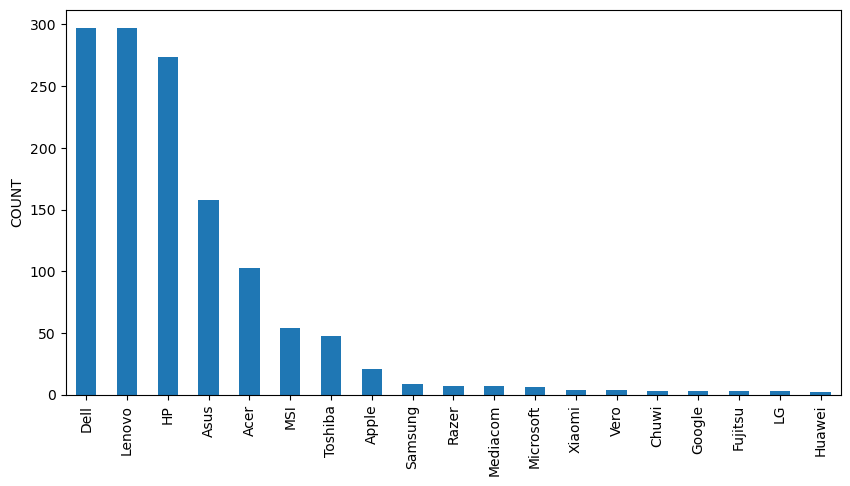

In [14]:
#Company Plot

Company = laptop.Company.value_counts()
plt.figure(figsize=(10,5))
Company.plot(kind = "bar")
plt.ylabel("COUNT")

plt.savefig("Company.png")
plt.show()

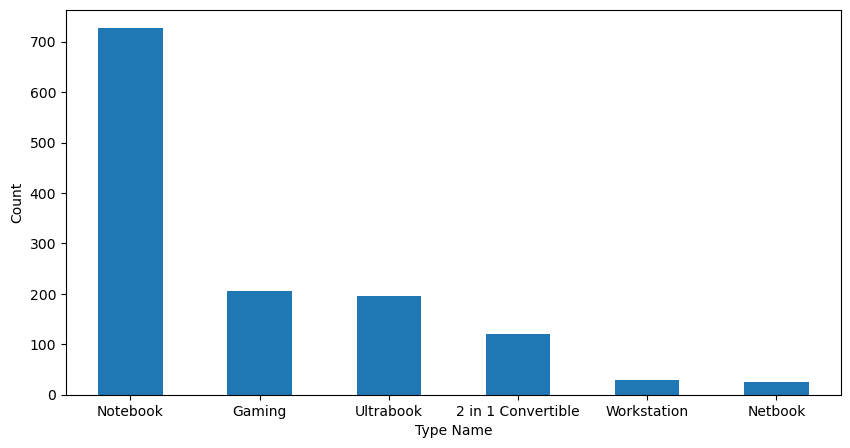

In [15]:
#Laptop type name
type_name = laptop.TypeName.value_counts()
plt.figure(figsize=(10,5))
type_name.plot(kind = "bar")
plt.ylabel("Count")
plt.xlabel("Type Name")
plt.xticks(rotation=0)

plt.savefig("type.png")
plt.show()

In [16]:
#Grouping the laptop price by average price.

typebyprice = laptop.groupby("TypeName")["Price_euros"].mean()

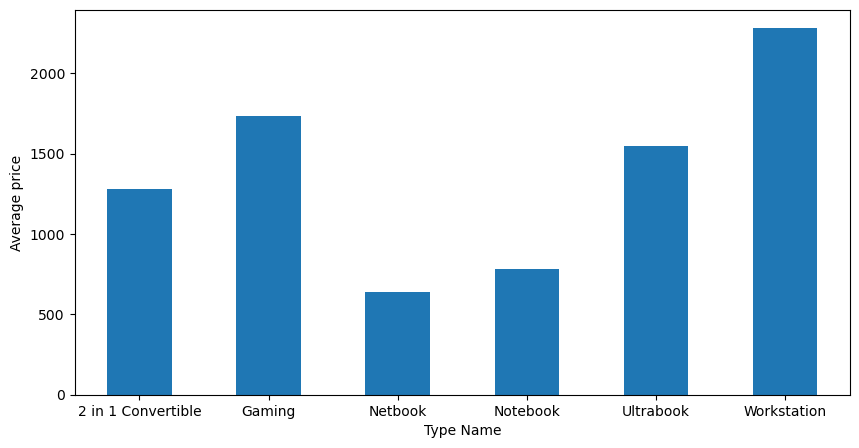

In [17]:
#Laptop type name
plt.figure(figsize=(10,5))
typebyprice.plot(kind = "bar")
plt.ylabel("Average price")
plt.xlabel("Type Name")
plt.xticks(rotation=0)

plt.savefig("type_price.png")
plt.show()

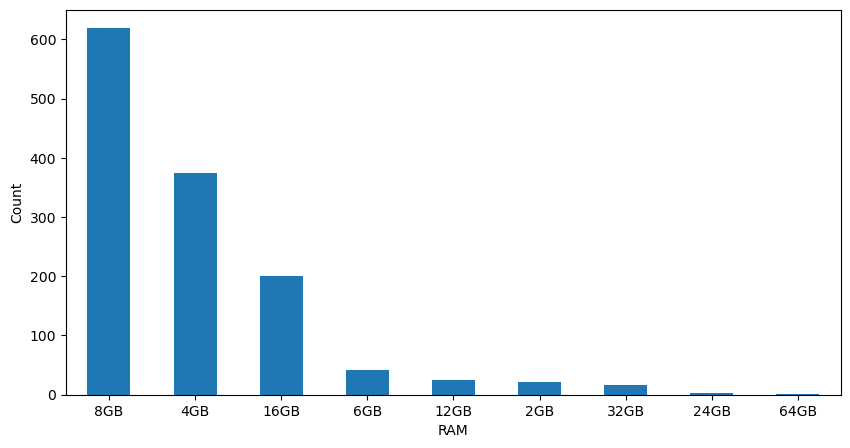

In [18]:
#Laptop RAM
Ram = laptop.Ram.value_counts()
plt.figure(figsize=(10,5))
Ram.plot(kind = "bar")
plt.ylabel("Count")
plt.xlabel("RAM")
plt.xticks(rotation=0)

plt.savefig("ram.png")
plt.show()

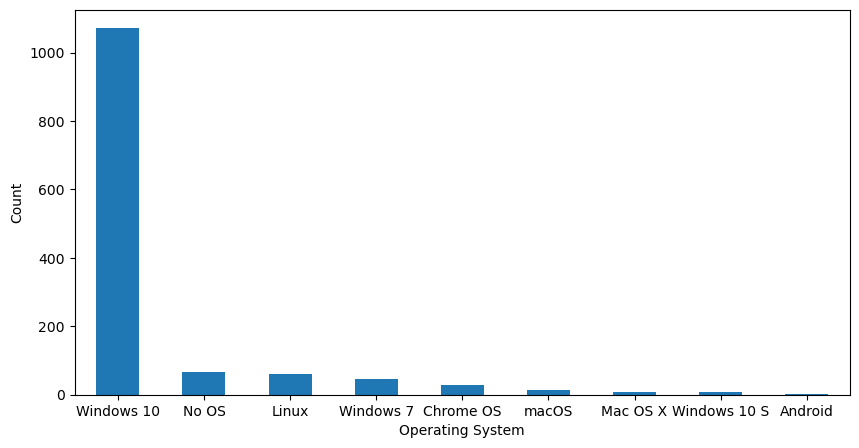

In [19]:
#Operating System
OpSys = laptop.OpSys.value_counts()
plt.figure(figsize=(10,5))
OpSys.plot(kind = "bar")
plt.ylabel("Count")
plt.xlabel("Operating System")
plt.xticks(rotation=0)

plt.savefig("Os.png")
plt.show()

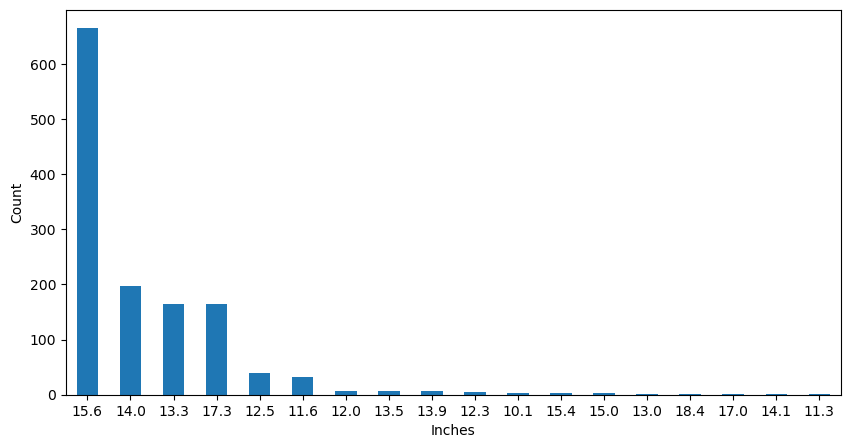

In [20]:
#Laptop Inches
Inches = laptop.Inches.value_counts()
plt.figure(figsize=(10,5))
Inches.plot(kind = "bar")
plt.ylabel("Count")
plt.xlabel("Inches")

plt.xticks(rotation=0)
plt.savefig("INCHES.png")
plt.show()

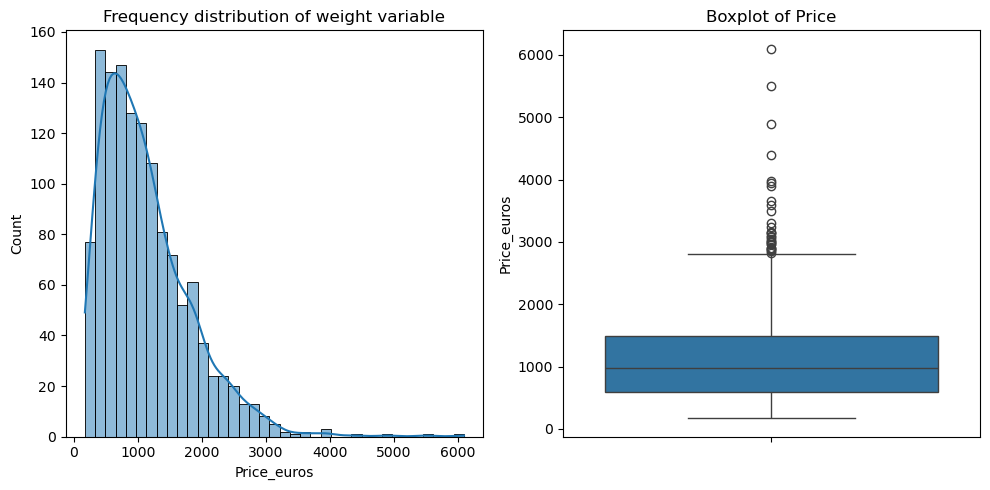

In [21]:
#Checking the distribution of the price column

fig, ax = plt.subplots(1, 2, figsize= (10, 5))

ax1 = sns.histplot(data= laptop, x= 'Price_euros', kde= True, ax= ax[0])
ax1.set_title('Frequency distribution of weight variable')
ax2 = sns.boxplot(data=  laptop, y= 'Price_euros', ax= ax[1])
ax2.set_title('Boxplot of Price')
plt.tight_layout()
plt.savefig("price.png")
plt.show()

### Step 3: Data Cleaning

This section contain the cleaning that was done on the dataset from converting string to numerics, and changing variables to categorical. Also, new columns where created and old ones were dropped.

In [22]:
# Remove of "GB" characters:

laptop['Ram'] = laptop['Ram'].str.replace('GB', '')

In [23]:
# Convert of data for integer type:

laptop['Ram'] = laptop['Ram'].astype(int)

In [24]:
# Remove of "kg" character:

laptop['Weight'] = laptop['Weight'].str.replace('kg', '')

In [25]:
# The weight values are converted to float type:

laptop['Weight'] = laptop['Weight'].astype(float)

<AxesSubplot:>

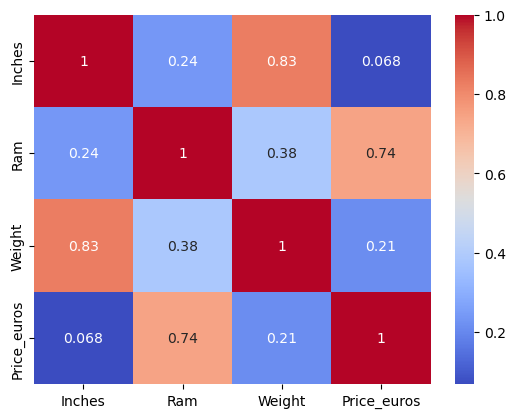

In [26]:
sns.heatmap(data= laptop.corr(numeric_only= True), annot= True, cmap= 'coolwarm')

### Step 4: Modelling

The section contain the traning process, different feature selection and extraction were done and different dataset was created.

#### Baseline model

In [27]:
#Importing library needed for the modelling
from sklearn.model_selection import train_test_split
from category_encoders import TargetEncoder
from sklearn.linear_model import Lasso, Ridge, ElasticNet, LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import statsmodels.api as sm

In [28]:
#Encoding the categorical variables
encoders_col = TargetEncoder(
    cols= ['Company', 'Product', 'TypeName', 'ScreenResolution', 'Cpu',
        'Memory', 'Gpu', 'OpSys'])

### Here we created two different dataset for training. The first model contain direct encoding of the categorical data withoyt further feature extraction.

In [29]:
#replicating the data in two for feature engineering and EDA
laptop1 = laptop.copy()
laptop2 = laptop.copy()

In [30]:
# Setting features (X) and target (y):

X = laptop1.drop(['Price_euros'], axis= 1)
y = laptop1['Price_euros']

# Splitting in train and test with test size at 30%:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42)

In [31]:
# Encoding X train data:

X_train = encoders_col.fit_transform(X_train, y_train)

# Encoding X test data:

X_test = encoders_col.transform(X_test)

In [33]:
# Log transformation of X_train and X_test:

X_train = np.log(X_train)
X_test = np.log(X_test)
# Log transformation of y_train and y_test:

y_train = np.log(y_train)
y_test = np.log(y_test)

In [43]:
#Importing KNN algorithm
from sklearn.neighbors import KNeighborsRegressor

In [44]:
#Creating a dictionary for the two model to serve as baseline model
models = {
    'LinearRegression': LinearRegression(),
    'KNeighborsRegressor': KNeighborsRegressor(n_neighbors=3)
}

In [45]:
# Creating a function used in training the models

def train_models(X_train_data: pd.DataFrame, y_train_data: pd.Series, models_dict: dict):
  """""""""
  X_train: independent variable data for model training.
  y_train: target variable data.
  models: dictionary with models.
  """""""""
  trained_models = dict()  # dictionary that will hold the trained models.

  for model_name, model_config in models.items():
    model_trained = model_config.fit(X_train_data, y_train_data)

    trained_models[model_name] = model_trained # the dictionary keys are the names of the respective models.

  return trained_models
# The models are then trained and instantiated on the variable:

models_trained = train_models(X_train, y_train, models)
models_trained

{'LinearRegression': LinearRegression(),
 'KNeighborsRegressor': KNeighborsRegressor(n_neighbors=3)}

In [46]:
#Creating a predicting funtion for test data
def predict_values(X: pd.DataFrame, models: dict):
  """""""""
  X: data with independent variables, train data or test data.
  models: dictionary with trained models.
  """""""""
  predicted_values = dict()

  for model_name, model_config in models.items():
    y_predict = model_config.predict(X)
    predicted_values[model_name] = y_predict # the predicted values ​​are stored in a dictionary where the keys are the model names.

  return predicted_values
# Values ​​are predicted, both from the X_test:

predict_values_test = predict_values(X_test, models_trained)

# As well as the X_train:

predict_values_train = predict_values(X_train, models_trained)

In [47]:
#Function for model evaluation using MAE, MSE and RMSE
def metrics_dataframe(y: pd.Series, predicted_y: dict):
  """""""""
  y: data with target variable, train data or test data.
  predicted_y: dictionary with predicted values for y from train data or test data.
  """""""""
  models_df = pd.DataFrame()

  for model_name, predict_y in predicted_y.items():
    model_r2_score = r2_score(y, predict_y)
    model_MAE = mean_absolute_error(y, predict_y)
    model_MSE = mean_squared_error(y, predict_y)
    model_RMSE = np.sqrt(mean_squared_error(y, predict_y))

    model_scores_df = pd.DataFrame(
        {'R² score': model_r2_score, 'MAE': model_MAE, 'MSE': model_MSE, 'RMSE': model_RMSE}, index= [model_name]
    ) # dataframe with scores for each model.

    models_df = pd.concat([model_scores_df, models_df]) # all dataframes are concated.

  return models_df

In [48]:
# A dataframe is created with the scores referring to the predicted values ​​from the test data:
scores_dataframe_test = metrics_dataframe((y_test), predict_values_test)
# And another dataframe is instantiated with the scores referring to the predicted values ​​from the training data:

scores_dataframe_train = metrics_dataframe(y_train, predict_values_train)

In [49]:
scores_dataframe_test

,R² score,MAE,MSE,RMSE
KNeighborsRegressor,0.806210,0.193500,0.068684,0.262076
LinearRegression,0.796364,0.203155,0.072173,0.268651


## Model 2

This section, additional features were created from the laptop datset to improve the model performance.

In [58]:
laptop4 = laptop.copy()

In [59]:
laptop4.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60


<AxesSubplot:xlabel='TouchScreen', ylabel='Price_euros'>

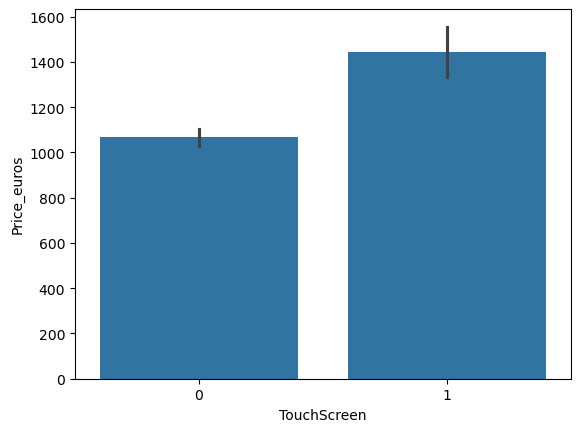

In [60]:
#TouchScreen feature extraction
laptop4['TouchScreen'] = laptop4['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)

#Plot against price
sns.barplot(x=laptop4['TouchScreen'],y=laptop4['Price_euros'])

<AxesSubplot:xlabel='Ips', ylabel='Price_euros'>

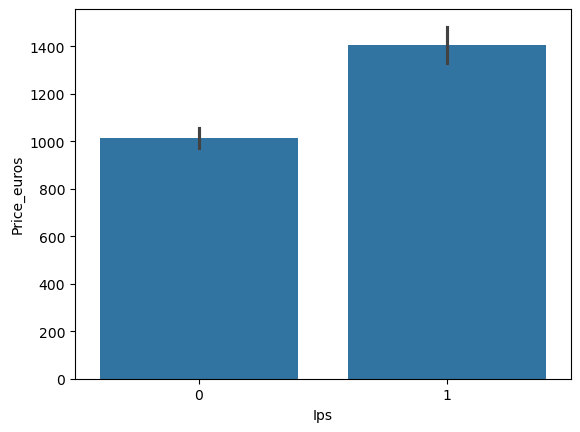

In [61]:
#Extract IPS column
laptop4['Ips'] = laptop4['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)
sns.barplot(x=laptop4['Ips'],y=laptop4['Price_euros'])

In [62]:
##Extract X-axis and Y-axis screen resolution dimensions
def X_resolution(s):
  return s.split()[-1].split("x")[0]
def Y_resolution(s):
  return s.split()[-1].split("x")[1]
#finding the x_res and y_res from screen resolution
laptop4['X_res'] = laptop4['ScreenResolution'].apply(lambda x: X_resolution(x))
laptop4['Y_res'] = laptop4['ScreenResolution'].apply(lambda y: Y_resolution(y))
#convert to numeric
laptop4['X_res'] = laptop4['X_res'].astype('int')
laptop4['Y_res'] = laptop4['Y_res'].astype('int')

In [63]:
laptop4.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,TouchScreen,Ips,X_res,Y_res
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,2560,1600
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,1440,900
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,0,0,1920,1080
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,2880,1800
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,2560,1600


In [64]:
#Replacing inches, X and Y resolution to PPI
laptop4['ppi'] = (((laptop4['X_res']**2) + (laptop4['Y_res']**2))**0.5/laptop4['Inches']).astype('float')

In [65]:
#We extract Name of CPU which is first 3 words from Cpu column and then we will check which processor it is
def fetch_processor(x):
  cpu_name = " ".join(x.split()[0:3])
  if cpu_name == 'Intel Core i7' or cpu_name == 'Intel Core i5' or cpu_name == 'Intel Core i3':
    return cpu_name
  elif cpu_name.split()[0] == 'Intel':
    return 'Other Intel Processor'
  else:
    return 'AMD Processor'
laptop4['Cpu_brand'] = laptop4['Cpu'].apply(lambda x: fetch_processor(x))

In [66]:
#Memory type, we classify it into four (HHD, SSD, Flash storage, and hybrid)
laptop4['Memory'] = laptop4['Memory'].astype(str).replace('.0', '', regex=True)
laptop4["Memory"] = laptop4["Memory"].str.replace('GB', '')
laptop4["Memory"] = laptop4["Memory"].str.replace('TB', '000')
new = laptop4["Memory"].str.split("+", n = 1, expand = True)
laptop4["first"]= new[0]
laptop4["first"]=laptop4["first"].str.strip()
laptop4["second"]= new[1]


laptop4["Layer1HDD"] = laptop4["first"].apply(lambda x: 1 if "HDD" in x else 0)
laptop4["Layer1SSD"] = laptop4["first"].apply(lambda x: 1 if "SSD" in x else 0)
laptop4["Layer1Hybrid"] = laptop4["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
laptop4["Layer1Flash_Storage"] = laptop4["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)
laptop4['first'] = laptop4['first'].str.replace(r'SSD', '')
laptop4['first'] = laptop4['first'].str.replace(r'HDD', '')
laptop4['first'] = laptop4['first'].str.replace(r'Flash Storage', '')
laptop4['first'] = laptop4['first'].str.replace(r'Hybrid', '')

laptop4['first'].fillna("0", inplace = True)
laptop4["second"].fillna("0", inplace = True)
laptop4["Layer2HDD"] = laptop4["second"].apply(lambda x: 1 if "HDD" in x else 0)
laptop4["Layer2SSD"] = laptop4["second"].apply(lambda x: 1 if "SSD" in x else 0)
laptop4["Layer2Hybrid"] = laptop4["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
laptop4["Layer2Flash_Storage"] = laptop4["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)

laptop4['second'] = laptop4['second'].str.replace(r'SSD', '')
laptop4['second'] = laptop4['second'].str.replace(r'HDD', '')
laptop4['second'] = laptop4['second'].str.replace(r'Flash Storage', '')
laptop4['second'] = laptop4['second'].str.replace(r'Hybrid', '')

laptop4["first"] = laptop4["first"].astype(int)
laptop4["second"] = laptop4["second"].astype(int)
laptop4["HDD"]=(laptop4["first"]*laptop4["Layer1HDD"]+laptop4["second"]*laptop4["Layer2HDD"])
laptop4["SSD"]=(laptop4["first"]*laptop4["Layer1SSD"]+laptop4["second"]*laptop4["Layer2SSD"])
laptop4["Hybrid"]=(laptop4["first"]*laptop4["Layer1Hybrid"]+laptop4["second"]*laptop4["Layer2Hybrid"])
laptop4["Flash_Storage"]=(laptop4["first"]*laptop4["Layer1Flash_Storage"]+laptop4["second"]*laptop4["Layer2Flash_Storage"])
laptop4.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
       'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
       'Layer2Flash_Storage'], inplace=True)

In [67]:

# Which brand GPU is in laptop
laptop4['Gpu_brand'] = laptop4['Gpu'].apply(lambda x:x.split()[0])
#there is only 1 row of ARM GPU so remove it
laptop4 = laptop4[laptop4['Gpu_brand'] != 'ARM']
laptop4.drop(columns=['Gpu'],inplace=True)

In [68]:
#Get Operation system
def cat_os(inp):
    if inp == 'Windows 10' or inp == 'Windows 7' or inp == 'Windows 10 S':
        return 'Windows'
    elif inp == 'macOS' or inp == 'Mac OS X':
        return 'Mac'
    else:
        return 'Others/No OS/Linux'
laptop4['os'] = laptop4['OpSys'].apply(cat_os)
laptop4.drop(columns=['OpSys'],inplace=True)

In [69]:
laptop4.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Weight,Price_euros,...,X_res,Y_res,ppi,Cpu_brand,HDD,SSD,Hybrid,Flash_Storage,Gpu_brand,os
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128 SSD,1.37,1339.69,...,2560,1600,226.983005,Intel Core i5,0,128,0,0,Intel,Mac
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128 Flash Storage,1.34,898.94,...,1440,900,127.677940,Intel Core i5,0,0,0,128,Intel,Mac
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256 SSD,1.86,575.00,...,1920,1080,141.211998,Intel Core i5,0,256,0,0,Intel,Others/No OS/Linux
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512 SSD,1.83,2537.45,...,2880,1800,220.534624,Intel Core i7,0,512,0,0,AMD,Mac
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256 SSD,1.37,1803.60,...,2560,1600,226.983005,Intel Core i5,0,256,0,0,Intel,Mac


In [70]:
#Dropping the columns that are not needed
laptop4.drop(columns=['ScreenResolution','Hybrid','Flash_Storage','Memory','Cpu','Product'],inplace=True)

In [72]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,ExtraTreesRegressor
from xgboost import XGBRegressor

In [73]:
#Converting the variables to category data type
laptop4['Company'] = laptop4['Company'].astype('category').cat.codes
laptop4['TypeName'] = laptop4['TypeName'].astype('category').cat.codes
laptop4['Cpu_brand'] = laptop4['Cpu_brand'].astype('category').cat.codes
laptop4['Gpu_brand'] = laptop4['Gpu_brand'].astype('category').cat.codes
laptop4['os'] = laptop4['os'].astype('category').cat.codes

In [74]:
#Creating the target and the features

X = laptop4.drop(columns=['Price_euros'])

y = np.log(laptop4['Price_euros'])

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)

In [75]:
#Scaling the features

from sklearn.preprocessing import StandardScaler
scale = StandardScaler()


X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

In [106]:
#Model XGBOOST
model = XGBRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

0.2152309100260275

In [107]:
print(f"R Square value {r2_score(y_test, y_pred)}")
print(f"Mean Absolute error {mean_absolute_error(y_test, y_pred)}")

R Square value 0.8797687365591245
Mean Absolute error 0.15588353634985658


In [79]:
y_train = y_train.to_numpy()

In [108]:
#Using new unscale data in the pipeline for the model that will be used for deployment
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)

In [109]:
#Using pipeline for transformation, encoding and training KNeighbors Regressor

step1 = ColumnTransformer(transformers=[
    ('scaler', StandardScaler(), [0,1,2,3,4,7,8,9,10,11,12])  # Add the new column for scaling
], remainder='passthrough')

scaler = StandardScaler()
knn = KNeighborsRegressor()

pipe_knn = Pipeline([
    ('scaler', scaler),
    ('KNN', knn)
])

pipe_knn.fit(X_train, y_train)

y_pred = pipe_knn.predict(X_test)

print('R2 score', r2_score(y_test, y_pred))
print('MAE', mean_absolute_error(y_test, y_pred))
print('RMSE', np.sqrt(mean_squared_error(y_test, y_pred)))

R2 score 0.8106179147879681
MAE 0.20383334222542204
RMSE 0.27012537546762905


In [110]:
#Using pipeline for transformation, encoding and training RandomForest Regressor
step1 = ColumnTransformer(transformers=[
    ('scaler', StandardScaler(), [0,1,2,3,4,7,8,9,10,11,12])  # Add the new column for scaling
], remainder='passthrough')

scaler = StandardScaler()
RF = RandomForestRegressor()

pipe_RF = Pipeline([
    ('scaler', scaler),
    ('RF', RF)
])

pipe_RF.fit(X_train, y_train)

y_pred = pipe_RF.predict(X_test)

print('R2 score', r2_score(y_test, y_pred))
print('MAE', mean_absolute_error(y_test, y_pred))
print('RMSE', np.sqrt(mean_squared_error(y_test, y_pred)))

R2 score 0.8736853267806148
MAE 0.1662528847340895
RMSE 0.22060880287237072


In [111]:
#Using pipeline for transformation, encoding and training GradientBoosting Regressor
step1 = ColumnTransformer(transformers=[
    ('scaler', StandardScaler(), [0,1,2,3,4,7,8,9,10,11,12])  # Add the new column for scaling
], remainder='passthrough')

scaler = StandardScaler()
grad = GradientBoostingRegressor()

pipe_grad = Pipeline([
    ('scaler', scaler),
    ('grad', grad)
])

pipe_grad.fit(X_train, y_train)

y_pred = pipe_grad.predict(X_test)

print('R2 score', r2_score(y_test, y_pred))
print('MAE', mean_absolute_error(y_test, y_pred))
print('RMSE', np.sqrt(mean_squared_error(y_test, y_pred)))

R2 score 0.8609362279739008
MAE 0.18369557845292198
RMSE 0.23147438510908372


In [112]:
#Using pipeline for transformation, encoding and training ExtraTrees Regressor
step1 = ColumnTransformer(transformers=[
    ('scaler', StandardScaler(), [0,1,2,3,4,7,8,9,10,11,12])  # Add the new column for scaling
], remainder='passthrough')

scaler = StandardScaler()
extra = ExtraTreesRegressor()

pipe_extra = Pipeline([
    ('scaler', scaler),
    ('extra', extra)
])

pipe_extra.fit(X_train, y_train)

y_pred = pipe_extra.predict(X_test)

print('R2 score', r2_score(y_test, y_pred))
print('MAE', mean_absolute_error(y_test, y_pred))
print('RMSE', np.sqrt(mean_squared_error(y_test, y_pred)))

R2 score 0.8763532731016269
MAE 0.16141862392951808
RMSE 0.21826658259527232


In [113]:
#Using pipeline for transformation, encoding and training XGB Regressor
step1 = ColumnTransformer(transformers=[
    ('scaler', StandardScaler(), [0,1,2,3,4,7,8,9,10,11,12])  # Add the new column for scaling
], remainder='passthrough')

scaler = StandardScaler()
XGB = XGBRegressor()

pipe = Pipeline([
    ('scaler', scaler),
    ('XGB', XGB)
])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

print('R2 score', r2_score(y_test, y_pred))
print('MAE', mean_absolute_error(y_test, y_pred))
print('RMSE', np.sqrt(mean_squared_error(y_test, y_pred)))


R2 score 0.8797687365591245
MAE 0.15588353634985658
RMSE 0.2152309100260275


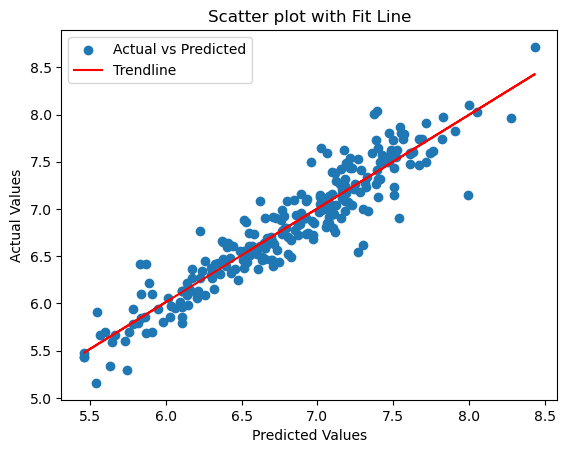

In [96]:
# Plot scatter plot
plt.scatter(y_pred, y_test, label='Actual vs Predicted')

# Add a trendline (fit line)
z = np.polyfit(y_pred, y_test, 1)
p = np.poly1d(z)
plt.plot(y_pred, p(y_pred), color='red', label='Trendline')

# Add labels and title
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Scatter plot with Fit Line')

# Show legend
plt.legend()

# Show plot
plt.show()

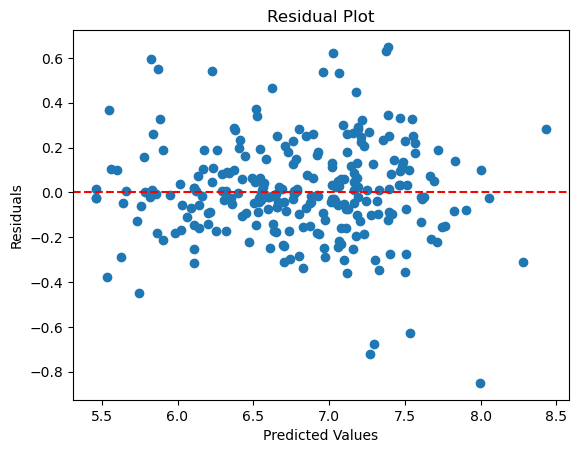

In [97]:
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

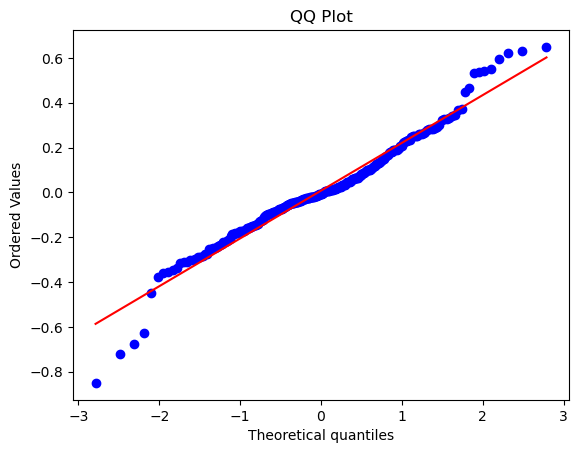

In [99]:
import scipy.stats as stats

stats.probplot(residuals, dist="norm", plot=plt)
plt.title('QQ Plot')
plt.show()


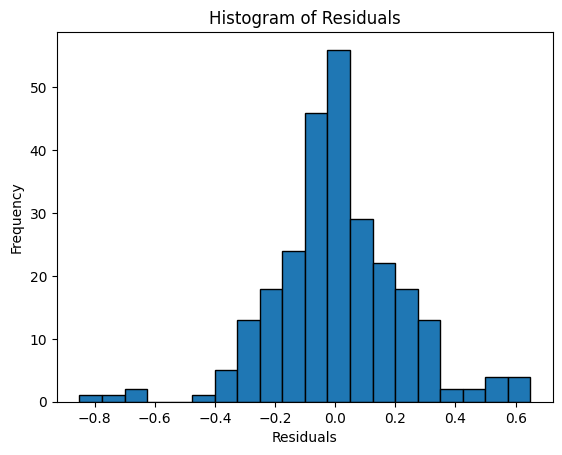

In [106]:
plt.hist(residuals, bins=20, edgecolor='black')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()

### Deployment

In [ ]:
#Downloading the final dataset and the model to use in the deplyment process
import pickle
pickle.dump(laptop4,open('laptop4.pkl','wb'))
pickle.dump(pipe,open('pipe.pkl','wb'))